In [30]:
#imports
from os.path import abspath,join,dirname,normpath,basename
from os import makedirs,rename,rmdir
import requests,zipfile,io
import shutil
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import math
import pandas as pd
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16,8.27)})

In [34]:
# functions
# replaces NaN value with mean if too much, else just removes (this is from my clinic, it's not perfect)
def handling_nan(given_data, thres):
    number_of_rows = given_data.shape[0]
    num_of_nan = given_data.isna().sum()
    num_of_minus = 0


    for i in range(len(given_data.columns)):
        col = given_data.columns[i]

        # checks if col is int or float (so we can replace it with median -> with median because if we take the mean for replacing then it would mess up the nominal features)
        if (given_data.dtypes[i] == np.float64) or (given_data.dtypes[i] == np.int64):

            # col has nan or -1 (what the "factorize" function turns nan into)
            if (num_of_nan[i] != 0) or (-1 in given_data[col].unique()):

                # variables for replacing
                df_without_minus = given_data[given_data[col] != -1]
                median_of_col = df_without_minus[col].median()

                # even though unlikely, the median can be nan -> so setting to 0 as default
                if math.isnan(median_of_col):
                    median_of_col = 0

                # if col contains -1, get how many -1 it contains
                if -1 in given_data[col].unique():
                    num_of_minus = given_data[col].value_counts()[-1]

                # too many nan, can't drop so replace with mean
                if num_of_nan[i] + num_of_minus > (number_of_rows * thres):
                    given_data[col].fillna(median_of_col, inplace = True)
                    given_data[col] = given_data[col].replace([-1], median_of_col)

                else:
                    # meaning we can drop, so we just take the rows without NaN in that column
                    given_data = given_data[given_data[col].notna()]
                    given_data = given_data[given_data[col] != -1]

    return given_data

def count_countries(series):
    df = series.to_frame()
    sns.countplot(data=df,x='Country',order=pd.value_counts(df['Country']).iloc[:8].index).set(xlabel='Country',title="Top 8 countries in the Dataframe")
    plt.show()

# 1. Downloading Data

Note: This part has to be ran only once.

In [4]:
#Setup data
data_folder=join(dirname(abspath('')),'data')
makedirs(data_folder,exist_ok=True)

In [12]:
years = ['2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
base_link = "https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-YEAR.zip"
for year in years:
    link = base_link.replace('YEAR',year)
    download = requests.get(link)
    z = zipfile.ZipFile(io.BytesIO(download.content))
    all_members = z.filelist
    for member in all_members:
        name = member.filename
        if '.csv' in name and 'MACOS' not in name:
            print(f"Extracting {name}")
            entire_path = z.extract(member,path=data_folder)
            print("done")
            path = basename(normpath(entire_path))
            if year not in path:
                rename(entire_path,entire_path.replace('.csv',f'{year}.csv'))

print("all extraction finished")

Extracting 2011 Stack Overflow Survey Results.csv
done
Extracting 2012 Stack Overflow Survey Results.csv
done
Extracting 2013 Stack Overflow Survey Responses.csv
done
Extracting 2014 Stack Overflow Survey Responses.csv
done
Extracting 2015 Stack Overflow Developer Survey Responses.csv
done


KeyboardInterrupt: 

In [6]:
#Fix one broken path
folder_path = join(data_folder,'2016 Stack Overflow Survey Results')
fix_path = join(data_folder,'2016 Stack Overflow Survey Responses.csv')
broken_path = join(folder_path,'2016 Stack Overflow Survey Responses.csv')
shutil.move(broken_path,fix_path)
rmdir(folder_path)

In [16]:
# Fix the 2015 file.
path = join(data_folder,'2015 Stack Overflow Developer Survey Responses.csv')
with open(path,'r') as file:
    lines = file.readlines()
with open(path,'w') as file:
    for num, line in enumerate(lines):
        if num!=0:
            file.write(line)


# 2. Perform EDA

Extracting data

In [4]:
# taking common path
data_folder=join(dirname(abspath('')),'data')

# taking public data
public_data = [pd.read_csv(join(data_folder, 'survey_results_public2020.csv')),
               pd.read_csv(join(data_folder, 'survey_results_public2021.csv')),
               pd.read_csv(join(data_folder, 'survey_results_public2022.csv'))]

# taking schema data
schema_data = [pd.read_csv(join(data_folder, 'survey_results_schema2020.csv')),
               pd.read_csv(join(data_folder, 'survey_results_schema2021.csv')),
               pd.read_csv(join(data_folder, 'survey_results_schema2022.csv'))]


In [21]:
# Country data
#Read all data
data_2011 = pd.read_csv(join(data_folder,'2011 Stack Overflow Survey Results.csv'),encoding='windows-1252')
data_2012 = pd.read_csv(join(data_folder,'2012 Stack Overflow Survey Results.csv'))
data_2013 = pd.read_csv(join(data_folder,'2013 Stack Overflow Survey Responses.csv'))
data_2014 = pd.read_csv(join(data_folder,'2014 Stack Overflow Survey Responses.csv'))
data_2015 = pd.read_csv(join(data_folder,'2015 Stack Overflow Developer Survey Responses.csv'))
data_2016 = pd.read_csv(join(data_folder,'2016 Stack Overflow Survey Responses.csv'))
data_2017 = pd.read_csv(join(data_folder,'survey_results_public2017.csv'))
data_2018 = pd.read_csv(join(data_folder,'survey_results_public2018.csv'))
data_2019 = pd.read_csv(join(data_folder,'survey_results_public2019.csv'))
data_2020 = pd.read_csv(join(data_folder,'survey_results_public2020.csv'))
data_2021 = pd.read_csv(join(data_folder,'survey_results_public2021.csv'))
data_2022 = pd.read_csv(join(data_folder,'survey_results_public2022.csv'))

country_2011 = data_2011['What Country or Region do you live in?']
country_2012 = data_2012['What Country or Region do you live in?']
country_2013 = data_2013['What Country or Region do you live in?']
country_2014 = data_2014['What Country do you live in?']
country_2015 = data_2015['Country']
country_2016 = data_2016['country']
country_2017 = data_2017['Country']
country_2018 = data_2018['Country']
country_2019 = data_2019['Country']
country_2020 = data_2020['Country']
country_2021 = data_2021['Country']
country_2022 = data_2022['Country']

renaming_dict = {'What Country or Region do you live in?':"Country"}

country_2011.rename("Country",inplace=True)
country_2012.rename("Country",inplace=True)
country_2013.rename("Country",inplace=True)
country_2014.rename("Country",inplace=True)
country_2016.rename("Country",inplace=True)

all_countries = [country_2011, country_2012, country_2013, country_2014, country_2015, country_2016, country_2017, country_2018, country_2019, country_2020, country_2021, country_2022]

TypeError: 'method' object is not subscriptable

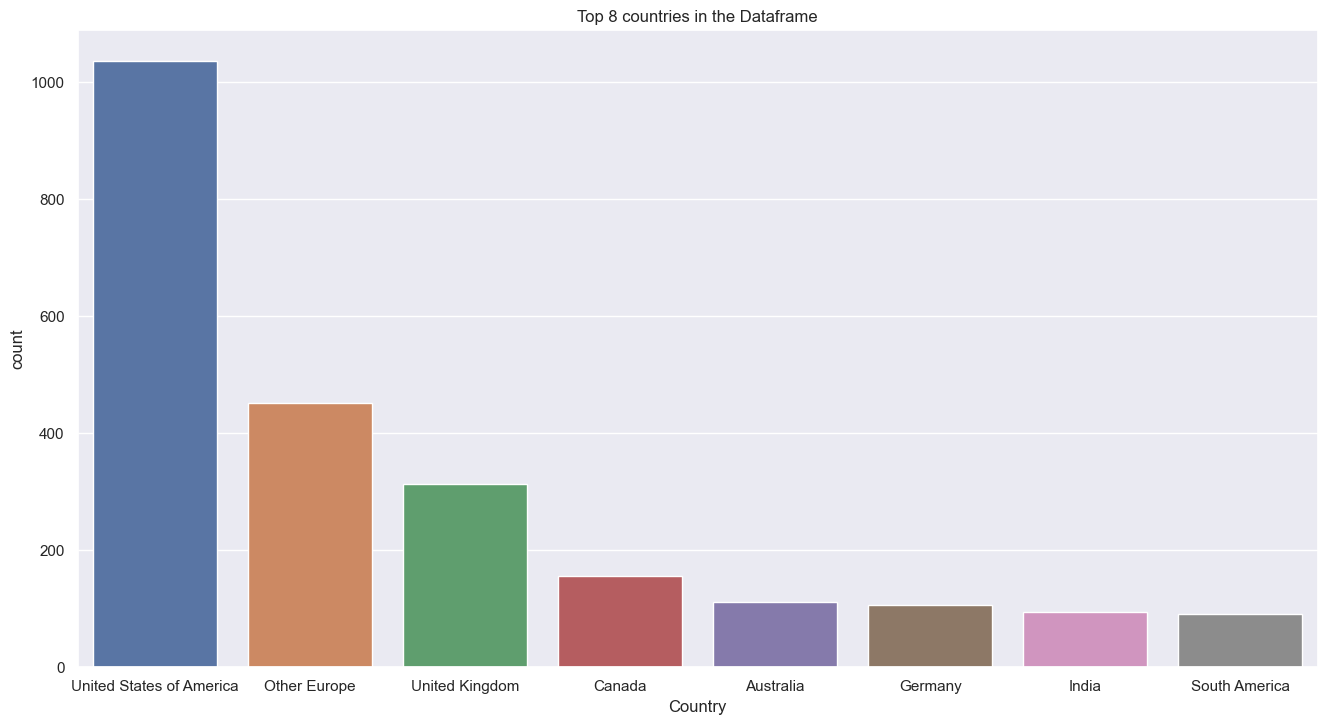

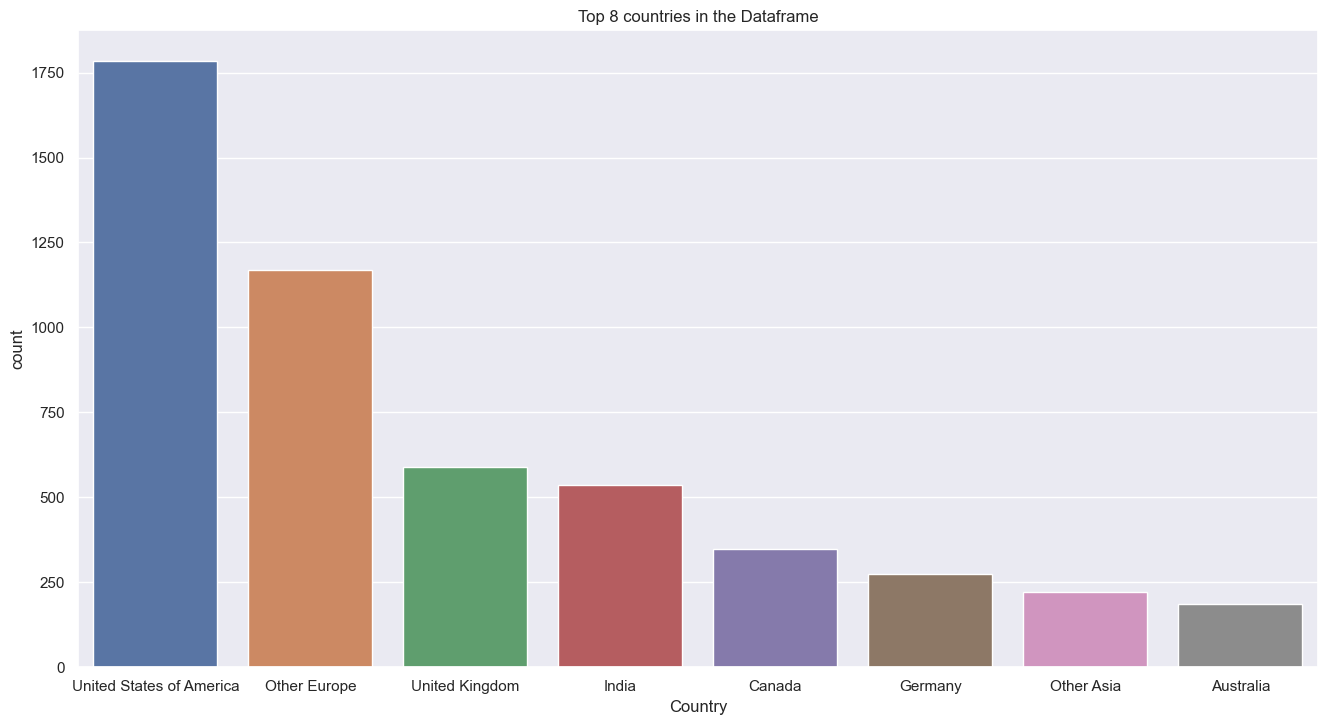

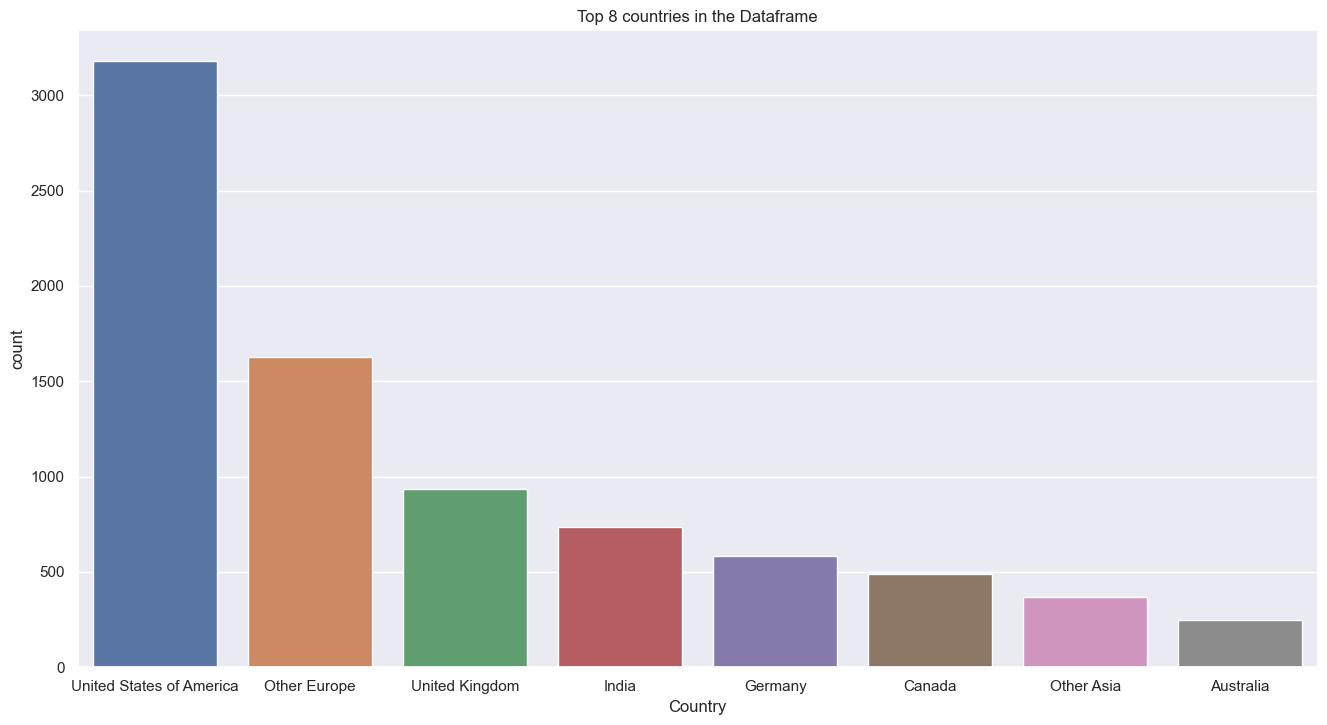

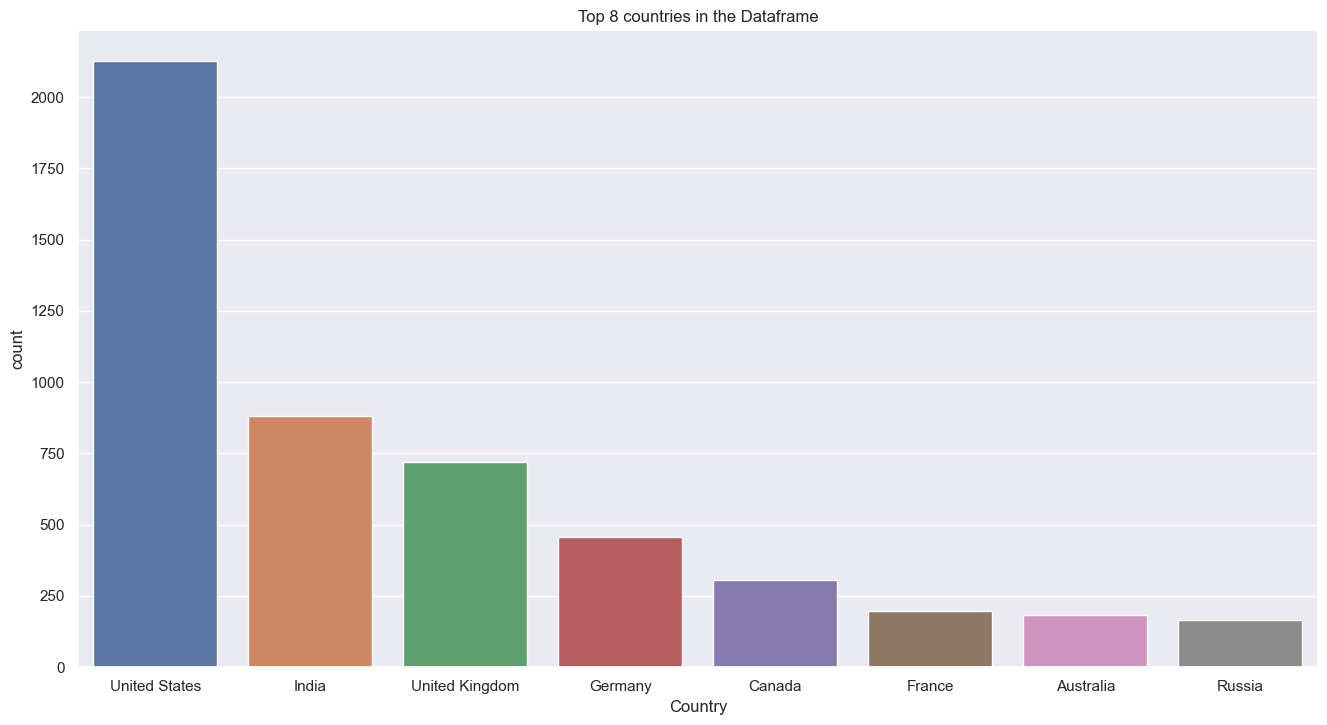

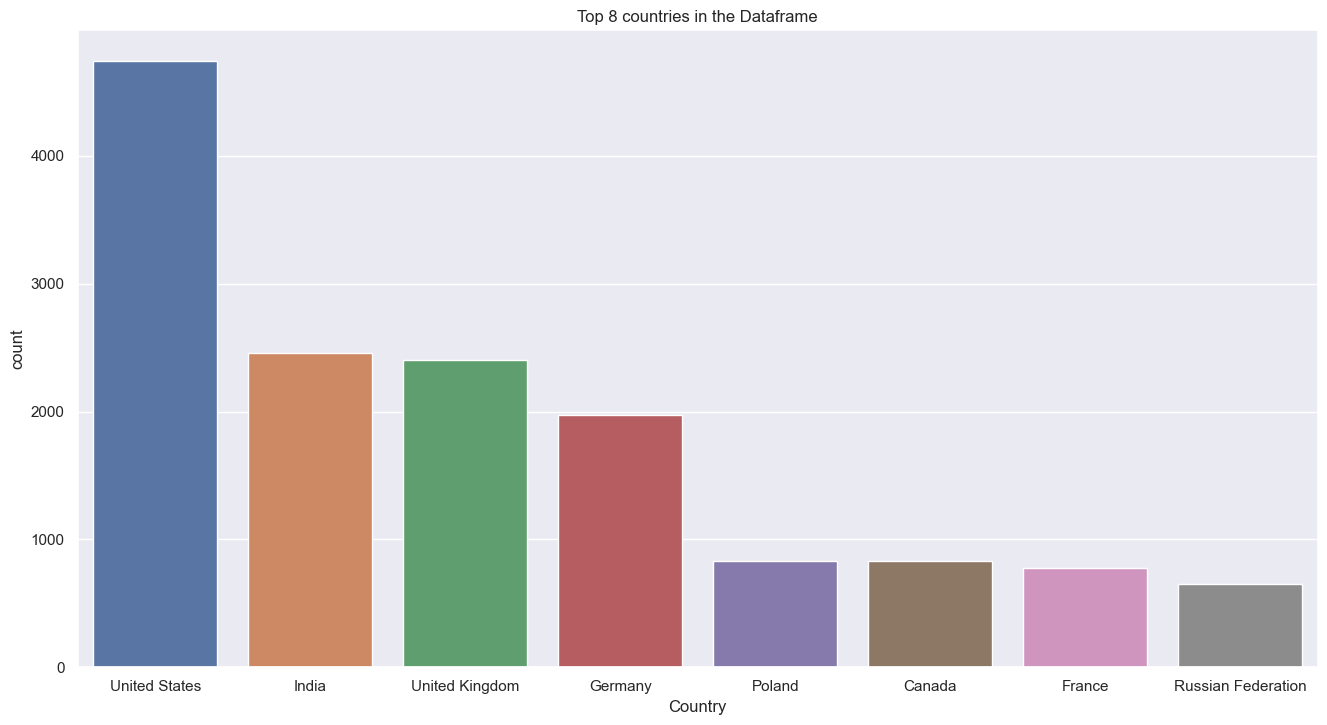

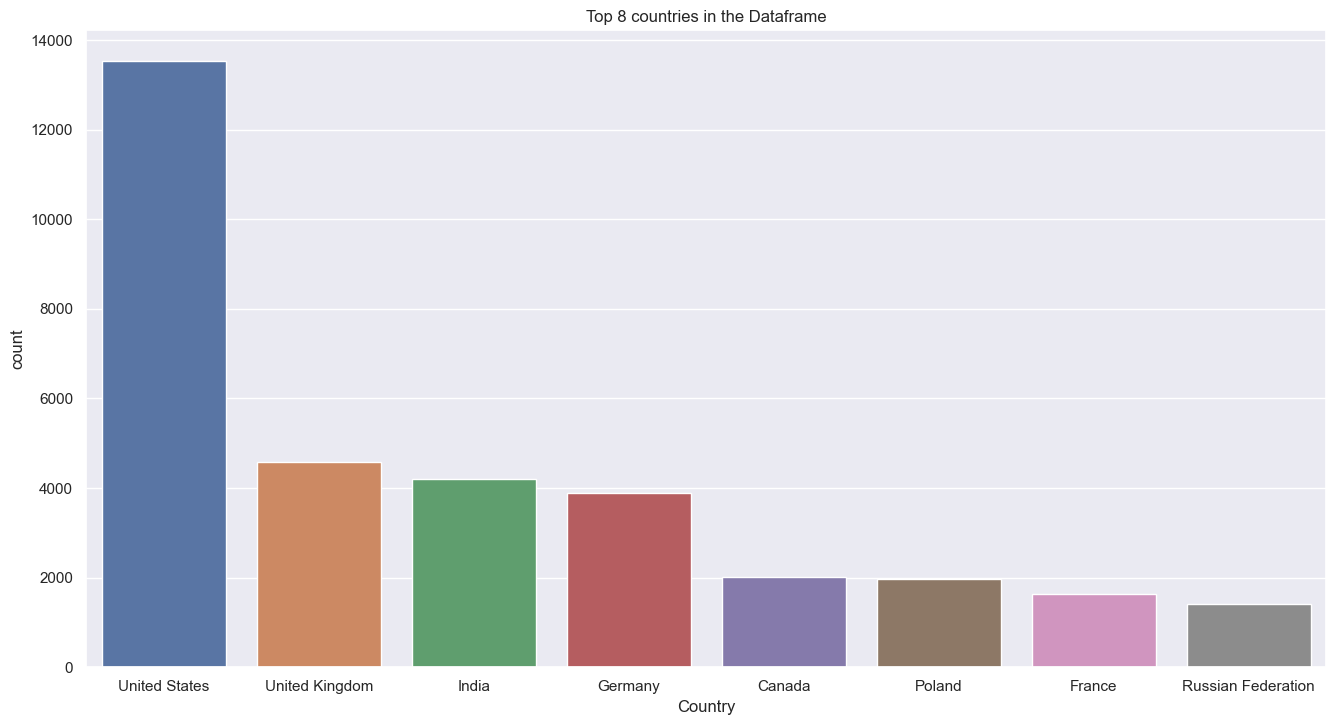

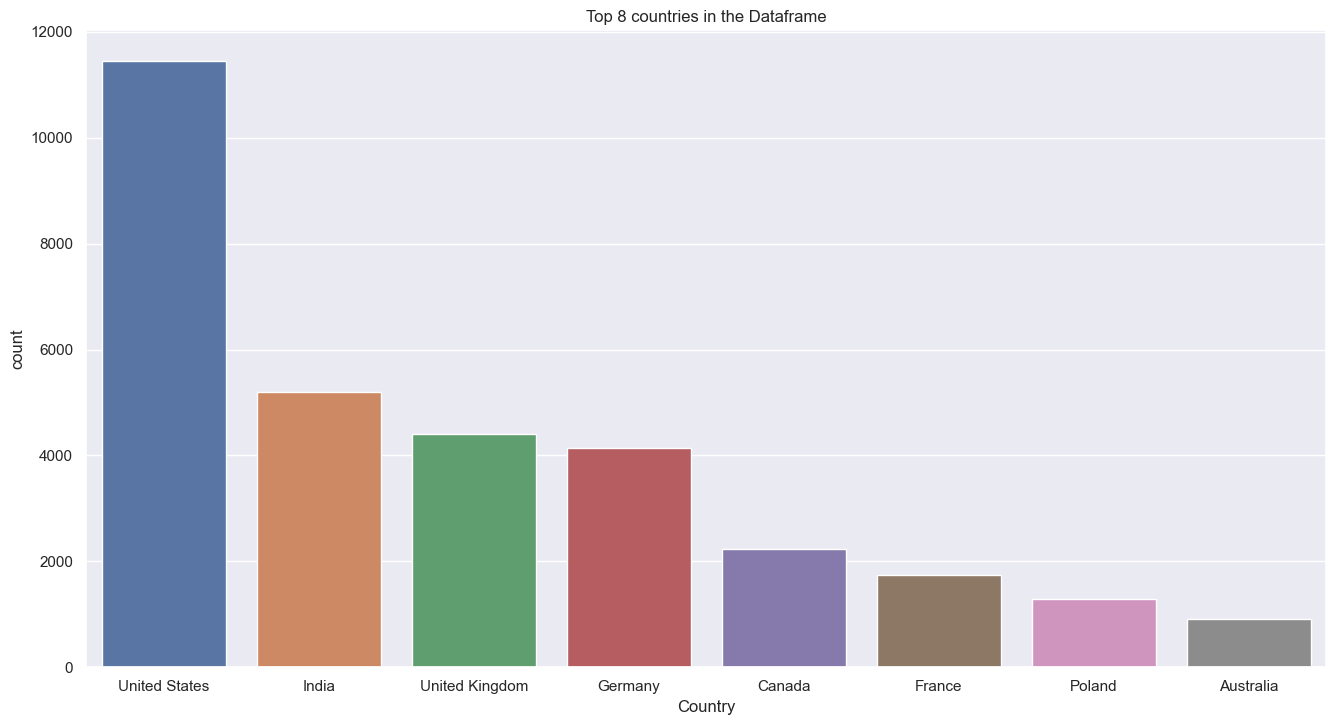

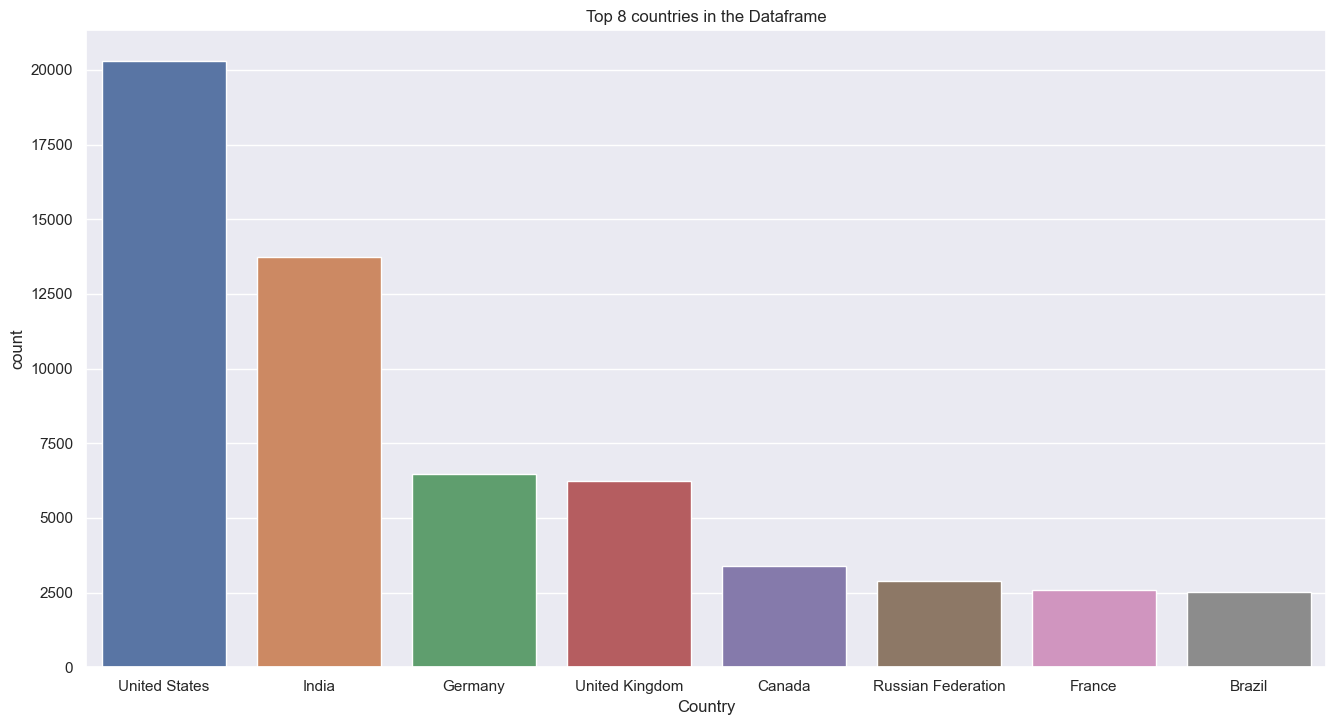

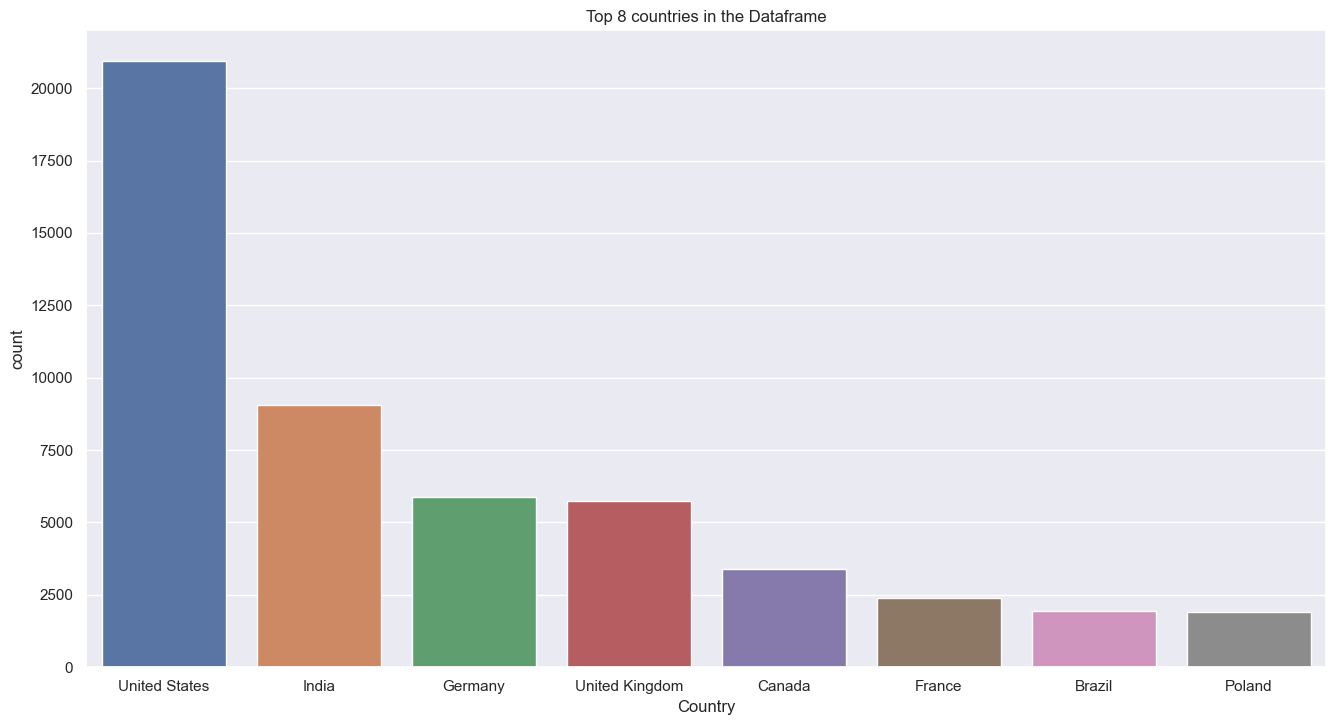

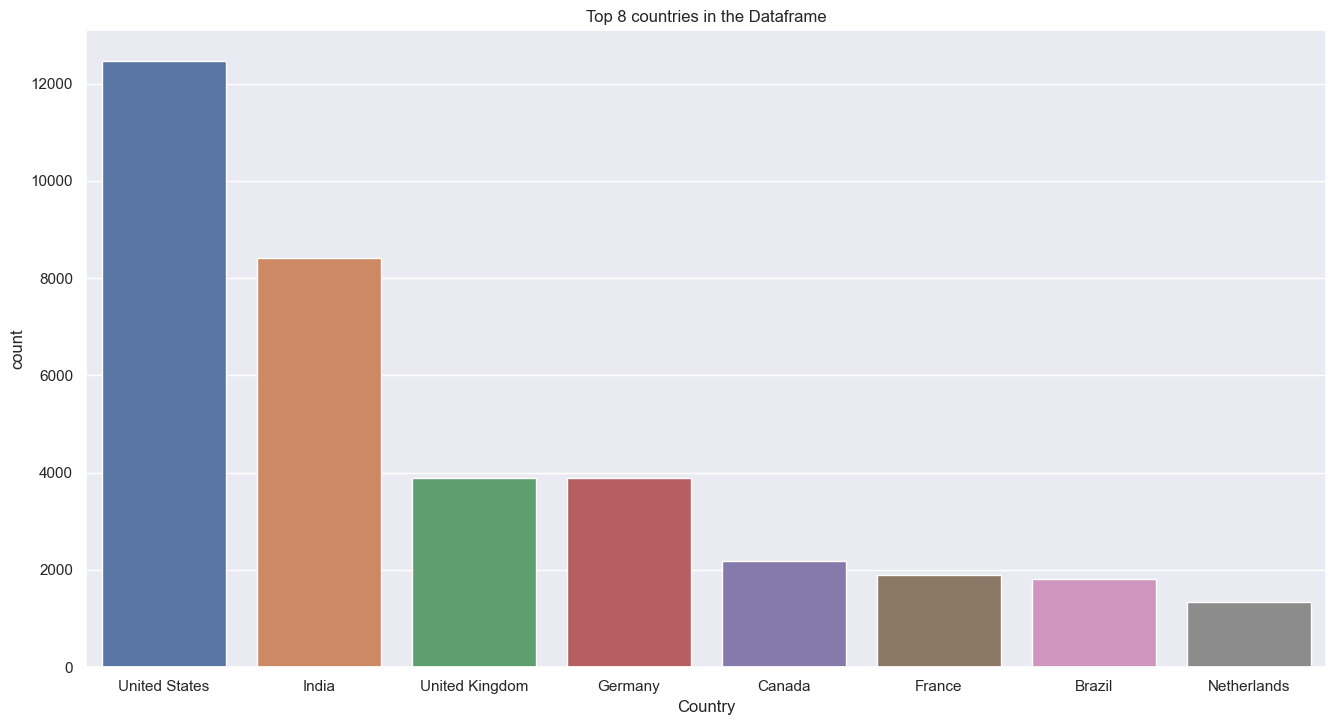

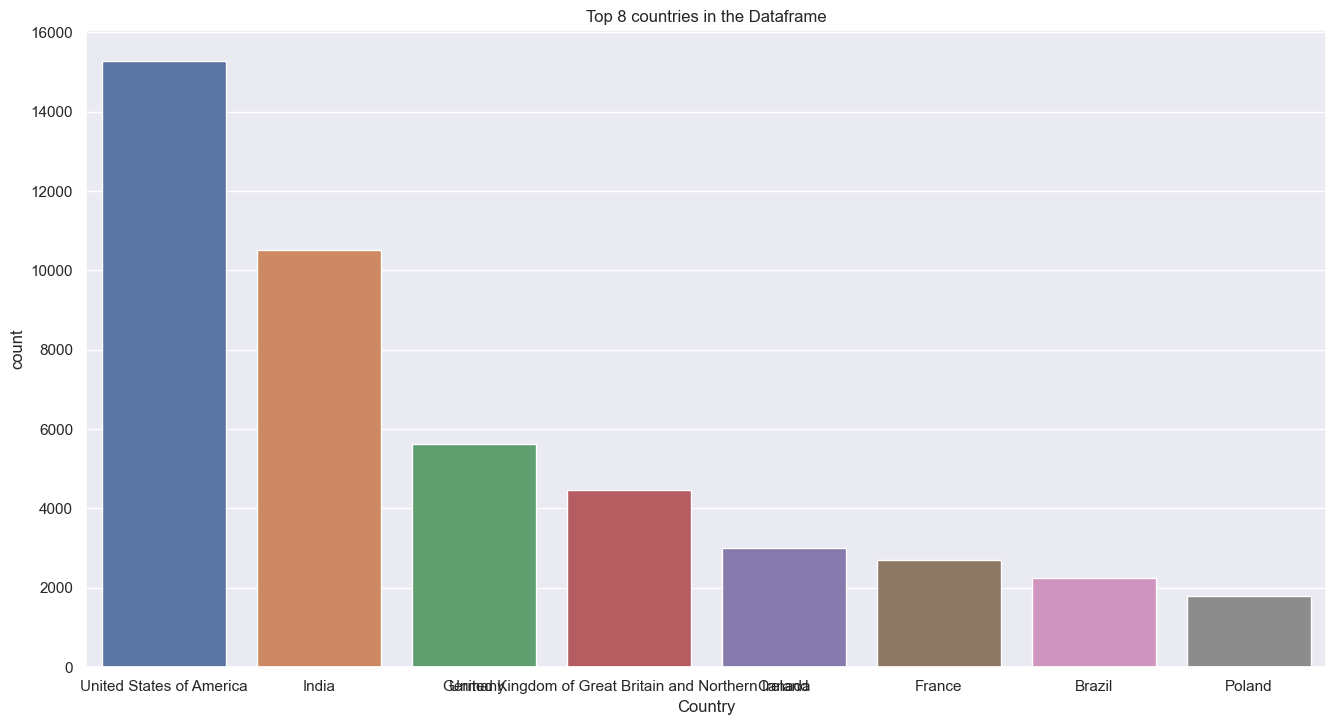

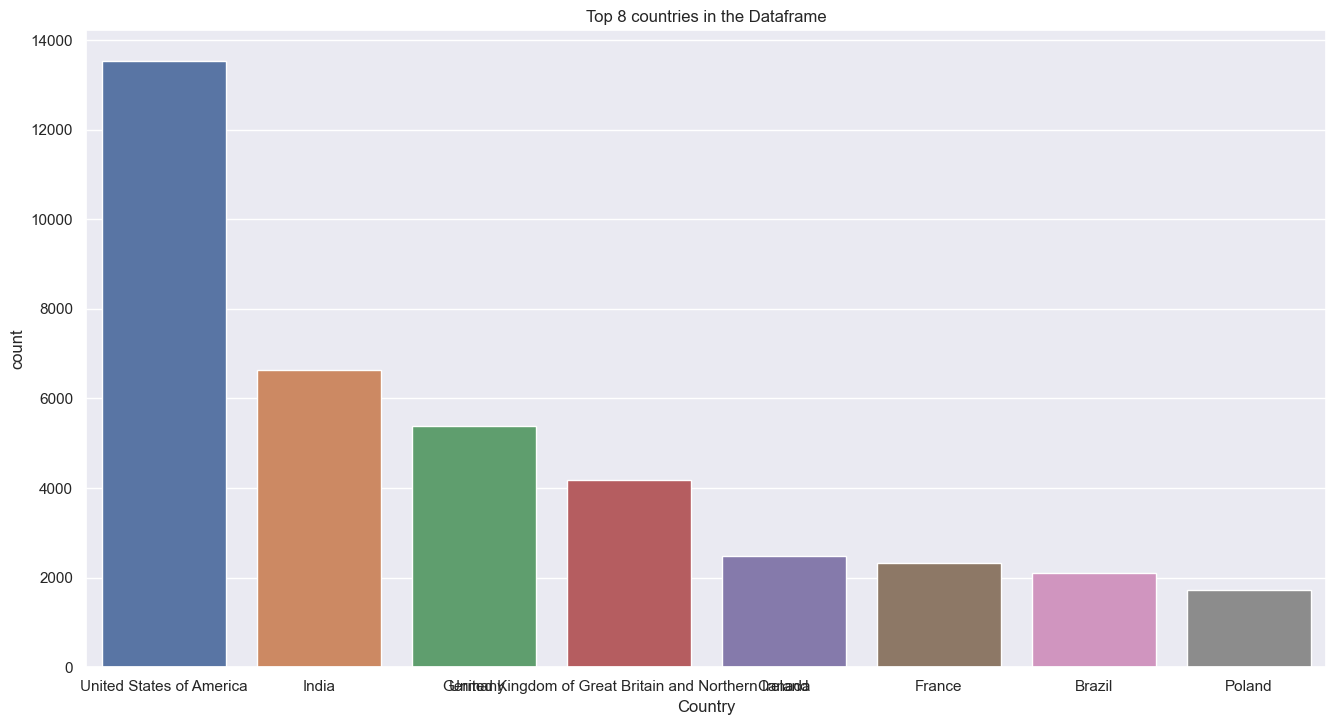

In [35]:
for df in all_countries:
    count_countries(df)

#### NaN values

Checking NaN

In [5]:
for current_data in public_data:
    print(current_data.isna().sum())

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64
ResponseId                          0
MainBranch                          0
Employment                        116
Country                             0
US_State                        68519
UK_Country                      79021
EdLevel                           313
Age1stCode                        196
LearnCode                         476
YearsCode                        1798
YearsCodePro                    22223
DevType                         16955
OrgSize                         22713
Currency                        22359
CompTotal                       36256
CompFreq                        31289
LanguageHaveWorkedWith           1082
LanguageWantToWorkWit

It seems that we have too many features, better to plot them to get a better visual

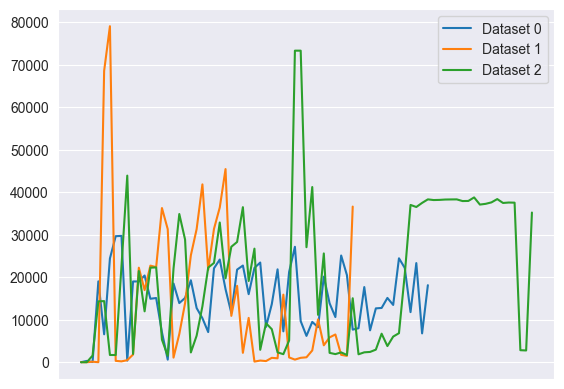

In [6]:
index = 0
# maybe somehow display years too?
for current_data in public_data:
    temp = current_data.isna().sum()
    temp.plot(label="Dataset " + str(index), xticks=[])
    index += 1

plt.legend()

there seems to be many empty data, let's handle them (or not?)

In [7]:
# something

#### General Visualization

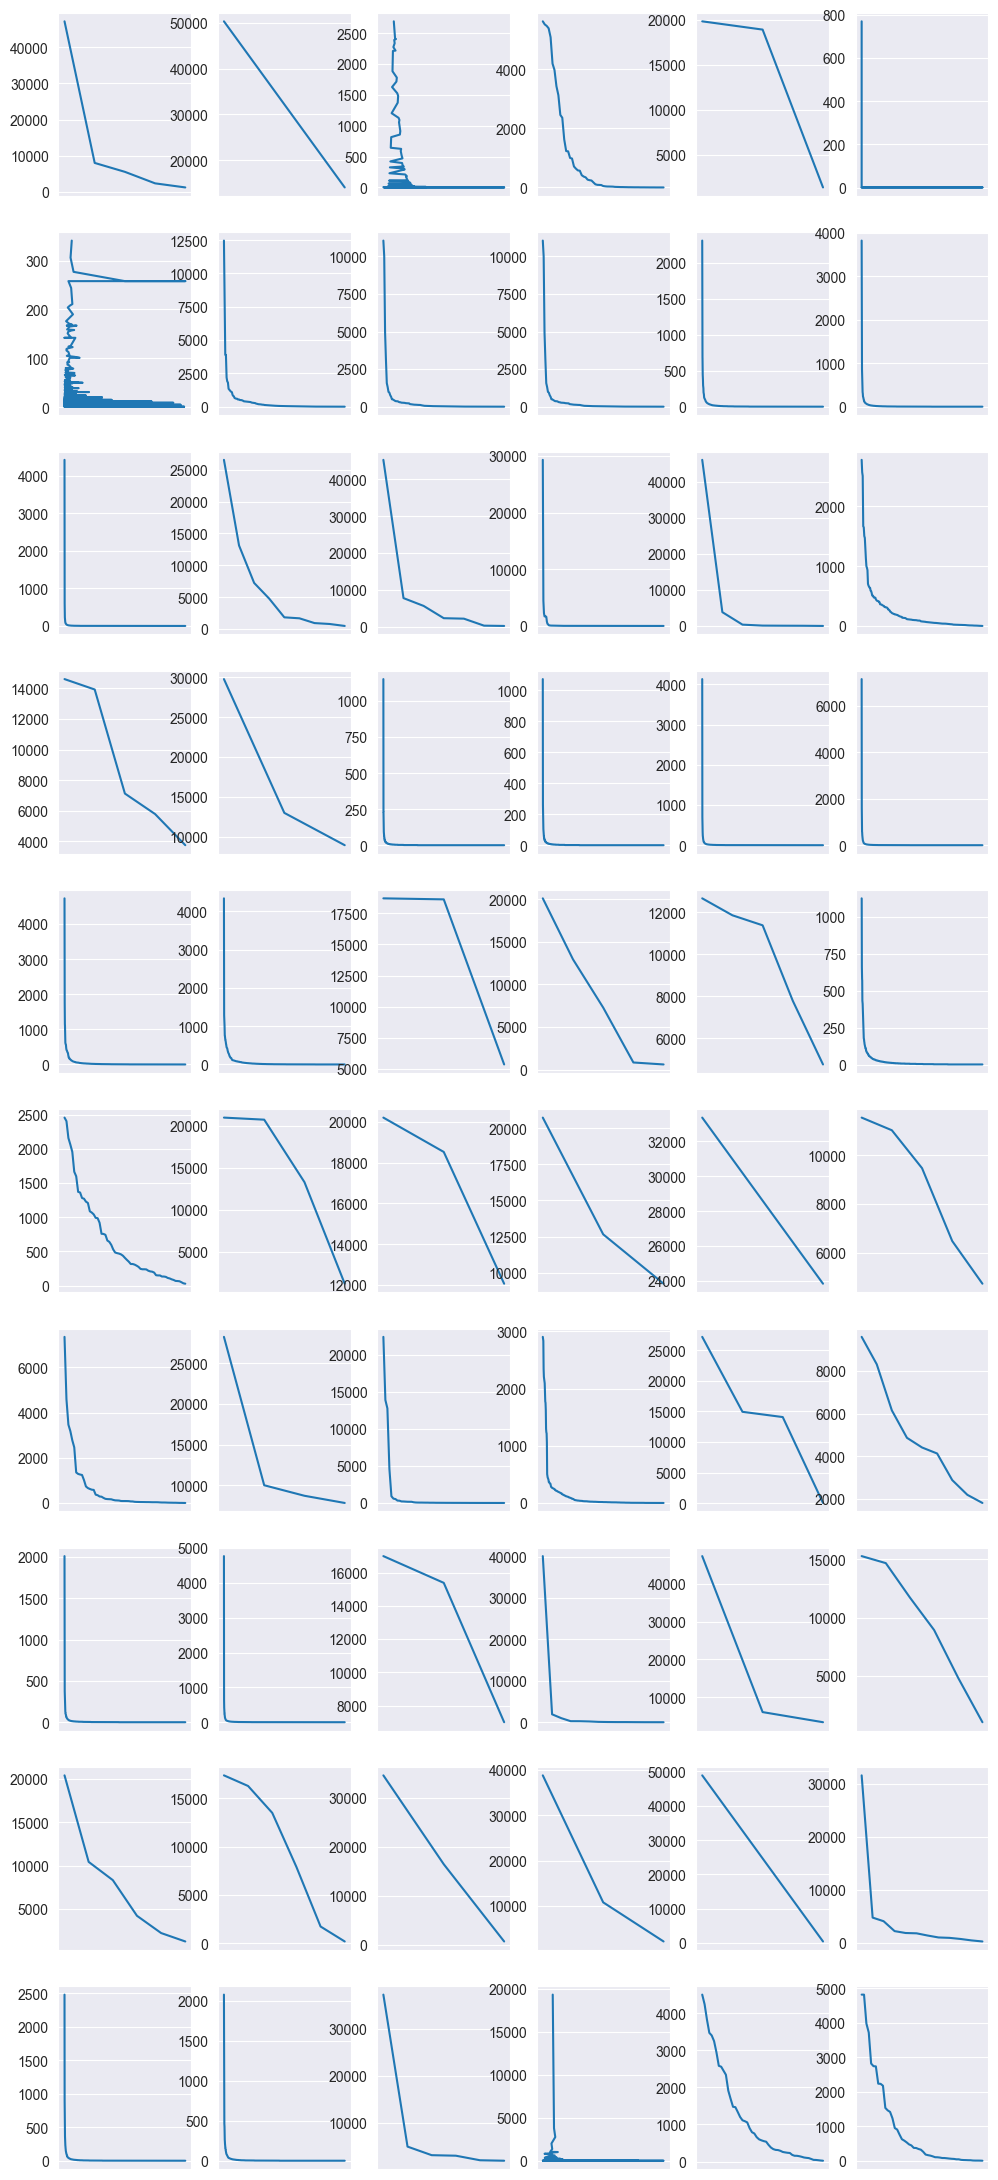

In [10]:
temp = public_data[0]

import matplotlib.pyplot as plt

# fig, axes = plt.subplots(len(temp.columns)//4, 3, figsize=(12, 48))
fig, axes = plt.subplots(len(temp.columns)//6, 6, figsize=(12, 28))

i = 1 # need to start from column 1 since 0 is just ids
# if we could somehow also the title of the question would be really cool
for current_data in public_data:
    for triaxis in axes:
        for axis in triaxis:
            if i < len(temp.columns): # so works until it reaches the last column (so can start from any column)
                temp.iloc[:,i].value_counts().plot(ax=axis, xticks=[])
            i += 1

In [13]:
temp.iloc[:, 1].value_counts().plot(ax=axis)
temp.iloc[:, 1].value_counts()

I am a developer by profession                                                   47193
I am a student who is learning to code                                            7970
I am not primarily a developer, but I write code sometimes as part of my work     5502
I code primarily as a hobby                                                       2314
I used to be a developer by profession, but no longer am                          1183
Name: MainBranch, dtype: int64

## Objective 1 - What kind of path can we follow to identify the types of tech groups?
For this, we will first look into features that might help us to identify types of tech groups. Afterwards we will perform aggregation or some kind of correlation function to see if there is a pattern. Which will finalize our types of tech groups we have.

Since each feature that has been collected for the same goal has different names throughout the years, need to identify them manually

2022: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME", "MISCTECH", "TOOLSTECH", "NEWCOLLABTOOL", "OFFICESTACKASYNC", "OFFICESTACKSYNC"

"DevType", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith", "NEWCollabToolsWantToWorkWith", "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith", "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith"


2021: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME", "MISCTECH", "TOOLSTECH", "NEWCOLLABTOOL"

"DevType", 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith'


2020: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME", "MISCTECH", "NEWCOLLABTOOL"

'DevType', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'DatabaseDesireNextYear', 'DatabaseWorkedWith'


2019: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME", "MISCTECH"

'DevType', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechDesireNextYear', 'MiscTechWorkedWith'


2018: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME"

'DevType', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', "FrameworkWorkedWith",
"FrameworkDesireNextYear"

2017: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME"

'DeveloperType', HaveWorkedLanguage, WantWorkLanguage,
HaveWorkedFramework, WantWorkFramework, HaveWorkedDatabase, WantWorkDatabase,
HaveWorkedPlatform, WantWorkPlatform

In [225]:
from pandas.core.dtypes.common import is_int64_dtype

def turn_df_to_list(given_dataframe):
    grouped_comma_fixed = given_dataframe.copy()

    # first turning "," inside each cell to "TO" such that afterwards when we turn it into a list it won't confuse us
    for col_name in given_dataframe.columns:
        if not is_int64_dtype(given_dataframe.dtypes[col_name]):
            grouped_comma_fixed[col_name] = given_dataframe[col_name].str.replace(', ','TO')

    # then turning each ";" separated value inside the cell into a list such that we can use explode
    grouped_to_list = grouped_comma_fixed.copy()

    for col_name in given_dataframe.columns:
        if not is_int64_dtype(grouped_to_list.dtypes[col_name]):
            grouped_to_list[col_name] = grouped_comma_fixed[col_name].str.split(';')

    return grouped_to_list

def plot_bar_with_labels(number_of_bins, data, column_name = "", extra_comment = ""):
    n = number_of_bins # number of bins

    fig = plt.subplots(figsize = (12,7))
    counts = data.values[0:n].tolist()
    labels = data.index[0:n]
    xs = np.arange(n)
    plt.xticks(xs, xs)

    for i, x in enumerate(xs):
        plt.bar(i, counts[x])

    plt.title("Top " + str(n) + " occurences of " + column_name + ": " + extra_comment)
    plt.xlabel('id')
    plt.ylabel('nr. of occurences')
    plt.legend(labels)

In [223]:
# Year 2022
temp22 = pd.read_csv(join(data_folder, 'survey_results_public2022.csv'))

# 2022: HAS “DEVTYPE”, “LANGUAGE”, “DATABASE”, “PLATFORM”, “WEBFRAME”, “MISCTECH”, “TOOLSTECH”, “NEWCOLLABTOOL”, “OFFICESTACKASYNC”, “OFFICESTACKSYNC”

temp22_grouped = temp22.groupby(["DevType", "LanguageHaveWorkedWith", "LanguageWantToWorkWith", "DatabaseHaveWorkedWith", "DatabaseWantToWorkWith", "PlatformHaveWorkedWith", "PlatformWantToWorkWith", "WebframeHaveWorkedWith", "WebframeWantToWorkWith", "MiscTechHaveWorkedWith", "MiscTechWantToWorkWith", "ToolsTechHaveWorkedWith", "ToolsTechWantToWorkWith", "NEWCollabToolsHaveWorkedWith", "NEWCollabToolsWantToWorkWith", "OfficeStackAsyncHaveWorkedWith", "OfficeStackAsyncWantToWorkWith", "OfficeStackSyncHaveWorkedWith", "OfficeStackSyncWantToWorkWith"]).size().reset_index().rename(columns={0:'count'})

temp22_grouped_list = turn_df_to_list(temp22_grouped)

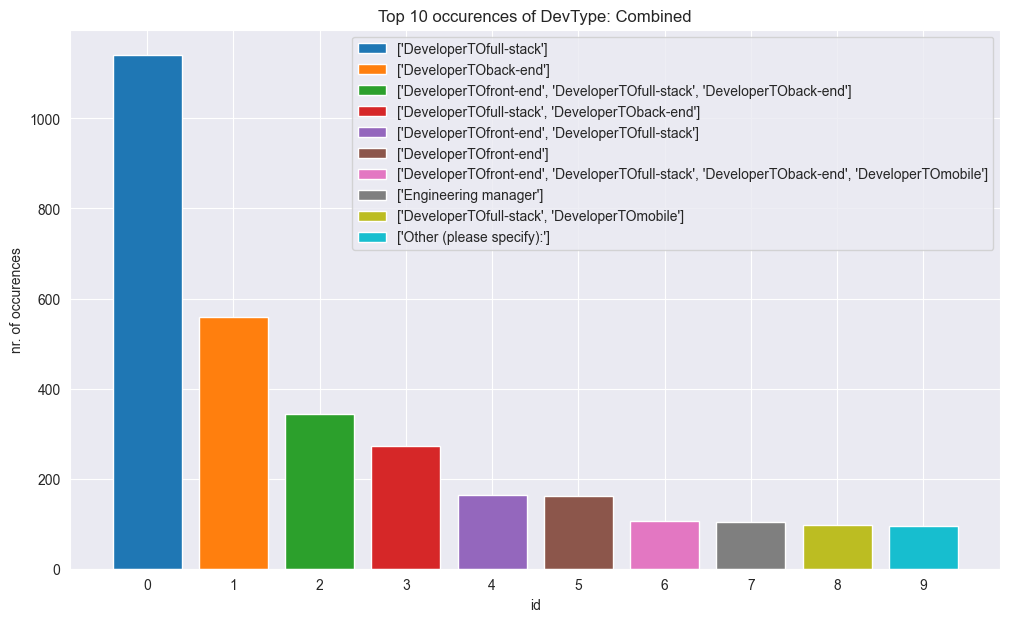

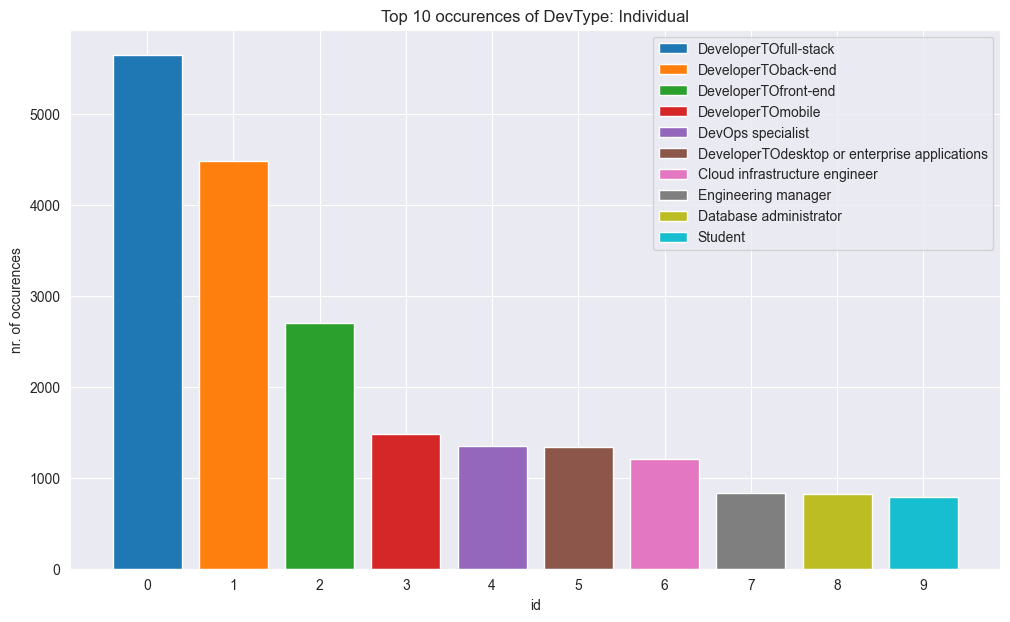

In [231]:
# combined
for_plot = temp22_grouped_list["DevType"].value_counts()
plot_bar_with_labels(10, for_plot, "DevType", "Combined")

# ind
temp22_grouped_list_exploded = temp22_grouped_list["DevType"].explode()
for_plot = temp22_grouped_list_exploded.value_counts()
plot_bar_with_labels(10, for_plot, "DevType", "Individual")


In [147]:
# Year 2021
temp21 = pd.read_csv(join(data_folder, 'survey_results_public2021.csv'))

# 2021: HAS "DEVTYPE", "LANGUAGE", "DATABASE", "PLATFORM", "WEBFRAME", "MISCTECH", "TOOLSTECH", "NEWCOLLABTOOL"

# "DevType", 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith'

temp21_grouped = temp21.groupby(["DevType", 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith']).size().reset_index().rename(columns={0:'count'})


temp21_grouped

,DevType,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,count
0,Academic researcher,APL;Assembly;Bash/Shell;C;C++;Clojure;COBOL;Cr...,APL;Assembly;Bash/Shell;C;C#;C++;Clojure;COBOL...,Cassandra;IBM DB2;Microsoft SQL Server;SQLite,Cassandra;IBM DB2;Microsoft SQL Server;SQLite,AWS;DigitalOcean;Google Cloud Platform;IBM Clo...,AWS;DigitalOcean;Google Cloud Platform;IBM Clo...,Angular;Angular.js;ASP.NET;ASP.NET Core ;FastA...,Angular;Angular.js;ASP.NET;ASP.NET Core ;FastA...,.NET Framework;Qt,.NET Framework;.NET Core / .NET 5;Qt;Torch/PyT...,Ansible;Flow;Git;Unity 3D;Unreal Engine,Git;Xamarin,Android Studio;Eclipse;Emacs;PyCharm;Rider;Sub...,Emacs;Visual Studio Code;Webstorm;Xcode,1
1,Academic researcher,APL;Crystal,APL;Crystal,Cassandra,Cassandra,AWS;Google Cloud Platform,AWS;Google Cloud Platform,Angular,Angular,.NET Framework;Apache Spark;TensorFlow,.NET Framework;Apache Spark;TensorFlow,Chef,Chef,RubyMine,RubyMine,1
2,Academic researcher,Assembly;Bash/Shell;C;C#;C++;JavaScript;Julia;...,Assembly;Bash/Shell;C;C#;C++;JavaScript;Julia;...,SQLite,SQLite,AWS,AWS,React.js,React.js,.NET Core / .NET 5;Apache Spark;React Native;T...,.NET Core / .NET 5;Apache Spark;React Native;T...,Docker;Git;Unity 3D,Docker;Git;Unity 3D;Unreal Engine,IntelliJ;Visual Studio Code,IntelliJ;Visual Studio Code,1
3,Academic researcher,Bash/Shell;C#;HTML/CSS;JavaScript;Node.js;PHP;...,Bash/Shell;C#;Go;Haskell;HTML/CSS;JavaScript;P...,Couchbase;MariaDB;Microsoft SQL Server;MongoDB...,Microsoft SQL Server;MySQL;SQLite,AWS;Google Cloud Platform;Heroku;Microsoft Azure,AWS;Heroku,Django;Flask;jQuery;React.js,Flask;Svelte,Cordova;Keras;NumPy;Pandas;TensorFlow;Torch/Py...,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,Docker;Git,Docker;Git,Atom;IPython/Jupyter;Vim;Visual Studio Code,IPython/Jupyter;Vim;Visual Studio Code,1
4,Academic researcher,Bash/Shell;C;C#;C++;HTML/CSS;JavaScript;Matlab...,C++;HTML/CSS;Java;JavaScript;Node.js;Python;Ru...,PostgreSQL,PostgreSQL,Heroku,AWS;DigitalOcean,Express;jQuery;React.js,Express;React.js;Vue.js,Keras;NumPy;Pandas;TensorFlow,Flutter;Keras;React Native;TensorFlow,Git;Unity 3D;Unreal Engine,Deno;Docker;Git;Unity 3D,Neovim;Vim;Visual Studio,Neovim;Vim,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14284,System administrator,C;HTML/CSS;Java;JavaScript;Node.js;PHP;Python,HTML/CSS;JavaScript;Node.js;PHP,MariaDB;MySQL;Redis;SQLite,MariaDB;MongoDB;Redis;SQLite,Heroku,AWS,Django;jQuery;Laravel;React.js;Vue.js,Laravel;React.js;Vue.js,React Native,Hadoop;React Native,Ansible;Docker;Git;Yarn,Ansible;Docker;Git;Kubernetes;Terraform;Yarn,Android Studio;Atom;PHPStorm;PyCharm;Vim;Xcode,Atom;PHPStorm;PyCharm;Vim,1
14285,System administrator,HTML/CSS;Java;JavaScript;Python,Java;JavaScript;Node.js;Python;Swift,PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,AWS;Heroku,AWS;Heroku,Django;jQuery,Express;React.js,NumPy,React Native;TensorFlow,Git,Docker;Git,Atom;Notepad++,Atom;IntelliJ;Visual Studio,1
14286,System administrator,Node.js;PowerShell;Python,Go;Rust;TypeScript,MongoDB;PostgreSQL,MongoDB;PostgreSQL,Google Cloud Platform;Microsoft Azure,Google Cloud Platform;Microsoft Azure,Django;Flask,React.js;Ruby on Rails,NumPy;Pandas,Apache Spark;TensorFlow;Torch/PyTorch,Docker,Ansible;Docker;Kubernetes,Visual Studio Code,Visual Studio,1
14287,System administrator;Educator,Bash/Shell;C#;HTML/CSS;JavaScript;Node.js;PHP;...,Bash/Shell;C#;C++;Go;HTML/CSS;JavaScript;Node....,MariaDB,MariaDB;MongoDB,DigitalOcean;Heroku;IBM Cloud or Watson,DigitalOcean;Heroku;IBM Cloud or Watson,Express;Vue.js,Express;Vue.js,.NET Framework;.NET Core / .NET 5,.NET Framework;.NET Core / .NET 5,Docker;Git,Docker;Git,Atom;Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visu